In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Watchlists:

## 1. Opening watchlists:

In [37]:
navid_watchlist = pd.read_csv('navid-watchlist.csv')
navid_watchlist.head()

,id,Name,Year
0,93573,May Days,1978
1,240928,With the Blood of Others,1974
2,202934,They Kill Me If I Don't Work and If I Work The...,1974
3,156311,Class of Struggle,1969
4,51326,The Bridge on the River Kwai,1957


In [38]:
hannah_watchlist = pd.read_csv('hannah-watchlist.csv')
hannah_watchlist.head()

,id,Name,Year
0,51940,Three Colours: Red,1994
1,436873,Climax,2018
2,51190,Irreversible,2002
3,29041,Enter the Void,2009
4,50967,I Stand Alone,1998


## 3. Getting shared movies of both watchlists:

In [39]:
merged_watchlist = pd.merge(hannah_watchlist, navid_watchlist)

In [40]:
print(merged_watchlist)

        id                                       Name  Year
0   307298                        The Disaster Artist  2017
1    51613                             The Green Mile  1999
2    51714                                      Alien  1979
3    51686                         The Straight Story  1999
4    42089                      A Brighter Summer Day  1991
5    51024                        The Virgin Suicides  1999
6    50717                           Marie Antoinette  2006
7    45585                                       Tess  1979
8    51271                             A Few Good Men  1992
9    51366                              Almost Famous  2000
10  311942                               Cameraperson  2016
11   97672                               U.S. Go Home  1994
12   35988                                      Yi Yi  2000
13   49468  Women on the Verge of a Nervous Breakdown  1988
14   51618                       Being John Malkovich  1999
15  348772                              

## 4. Watchlist Analysis

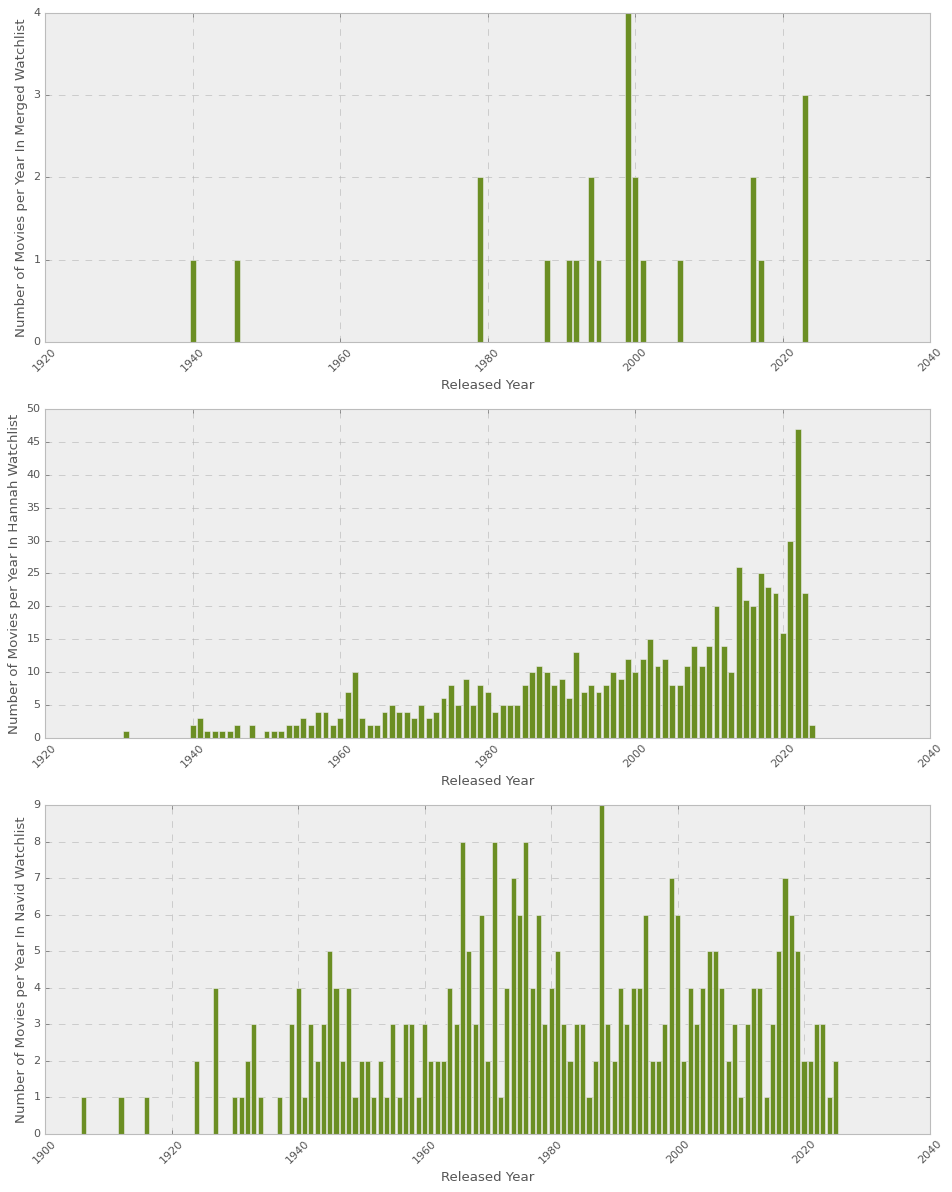

In [130]:
import pandas as pd
import matplotlib.pyplot as plt

i = 0

# Set up a figure and a set of subplots
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(12, 15))  # Adjust nrows and ncols as needed
names = ['Merged', 'Hannah', 'Navid']
# Plot each DataFrame
for ax, df in zip(axs, [merged_watchlist, hannah_watchlist, navid_watchlist]):
    movie_counts = df.groupby('Year').size()
    
    # Plotting
    ax.bar(movie_counts.index, movie_counts.values, color='olivedrab')
    ax.set_xlabel("Released Year")
    ax.set_ylabel(f"Number of Movies per Year In {names[i]} Watchlist")
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='x', rotation=45)
    i += 1
# Adjust layout to prevent labels from overlapping
plt.tight_layout()
plt.style.use('bmh')
plt.xticks(rotation=45)

# Display the plot
plt.show()
